<a href="https://colab.research.google.com/github/Madelineandrea/OnlineShopperPurchasingIntention/blob/main/online_shoppers_purchasing_intention_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics: Case Study
Dataset: **Online Shoppers Purchasing Intention**

Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

Question: **"Apakah calon pelanggan akan membeli produk secara online atau tidak?"**

Model: **Random Classifier**

Group 6:
* Abygael Adrianty Putri
* Axell Prita Aurelie Atmojo
* Madeline Andrea Sofian
* Ni Putu Ayu Sekar Dewi

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
DATA_PATH = "online_shoppers_intention.csv"

In [3]:
data = pd.read_csv(DATA_PATH)

# Data Understanding

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.describe(include = 'object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Check for missing values and replace them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


# Visualizing Proportion of Labels
to see whether the data is imbalance or not

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

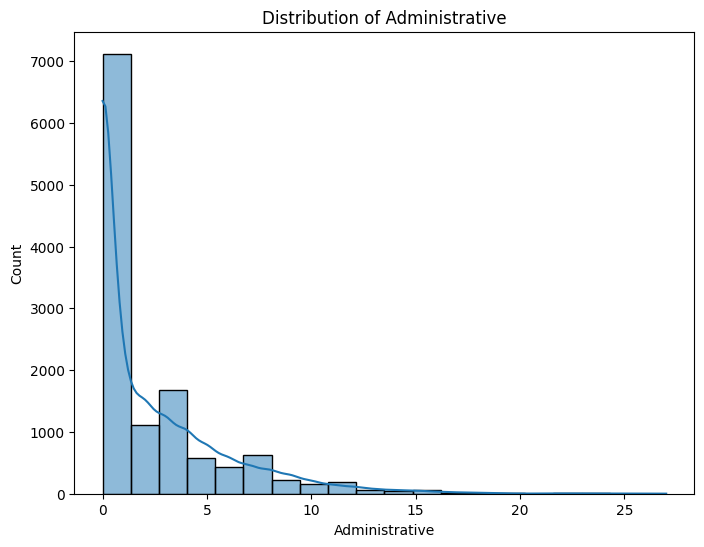

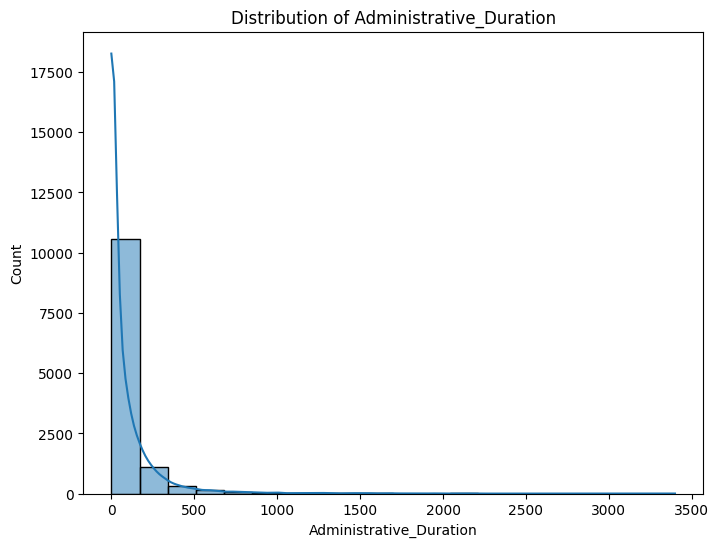

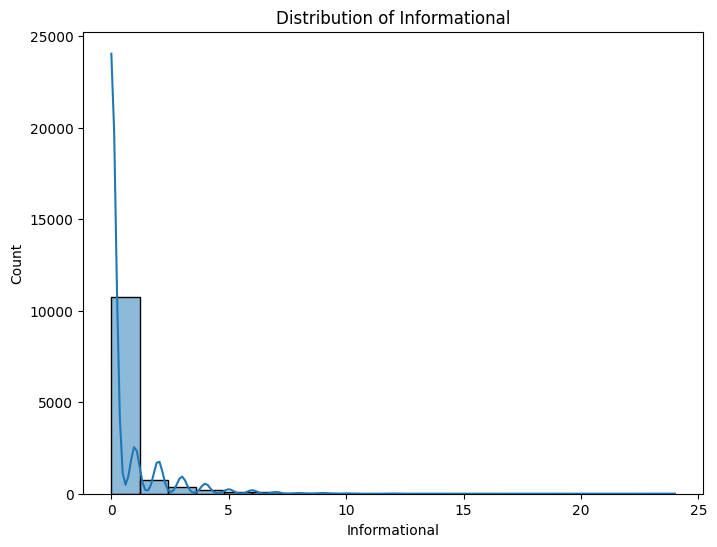

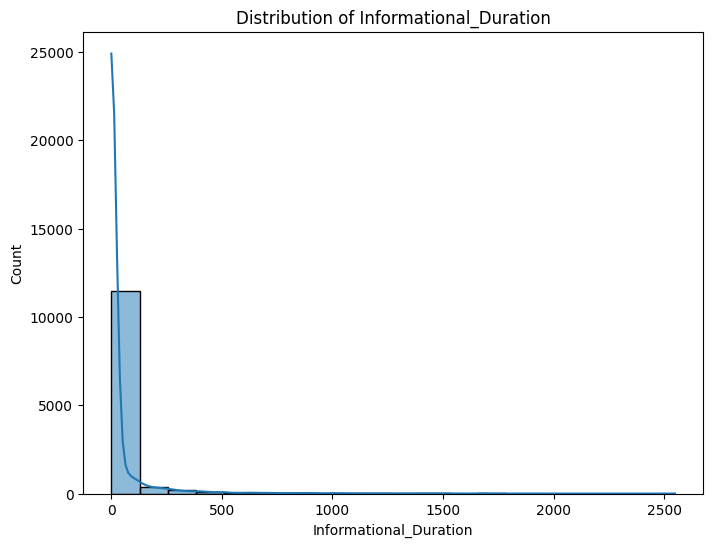

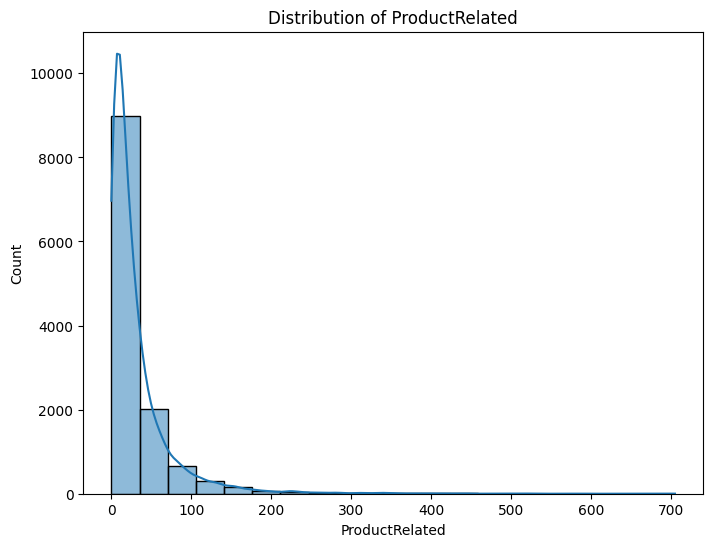

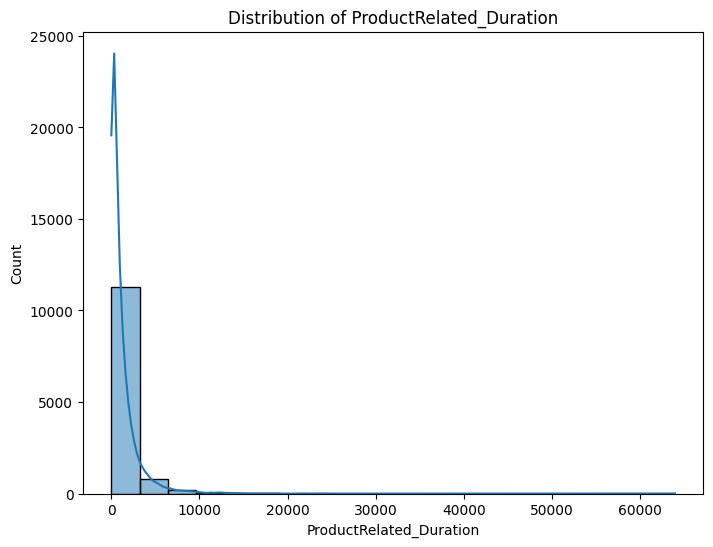

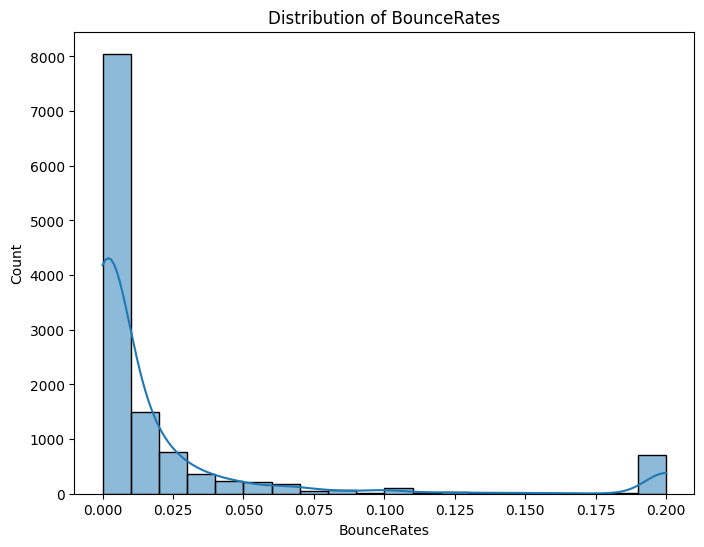

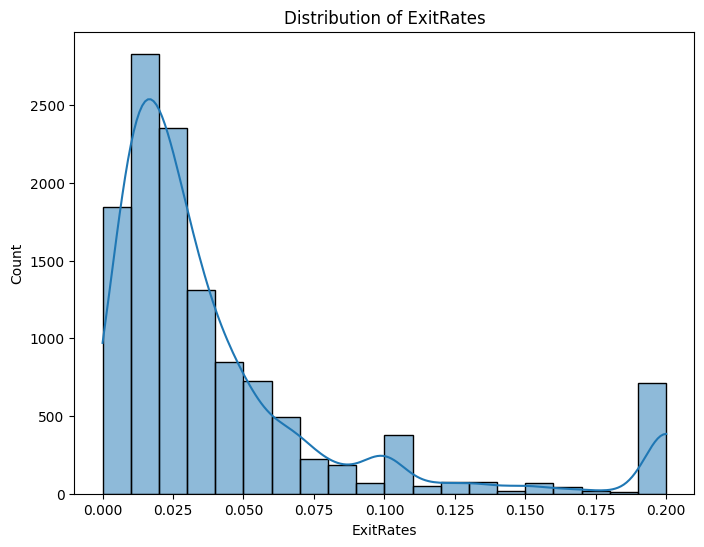

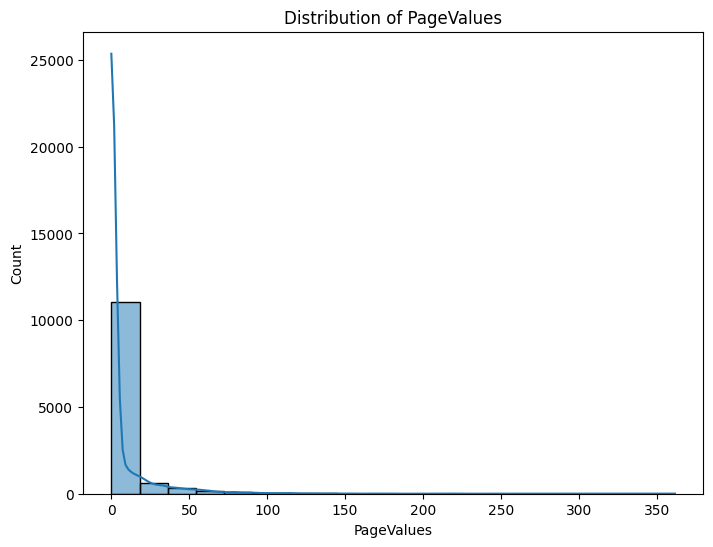

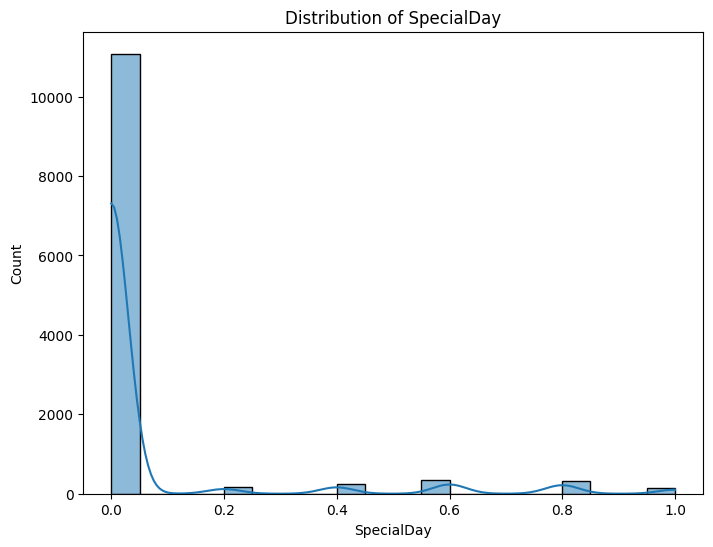

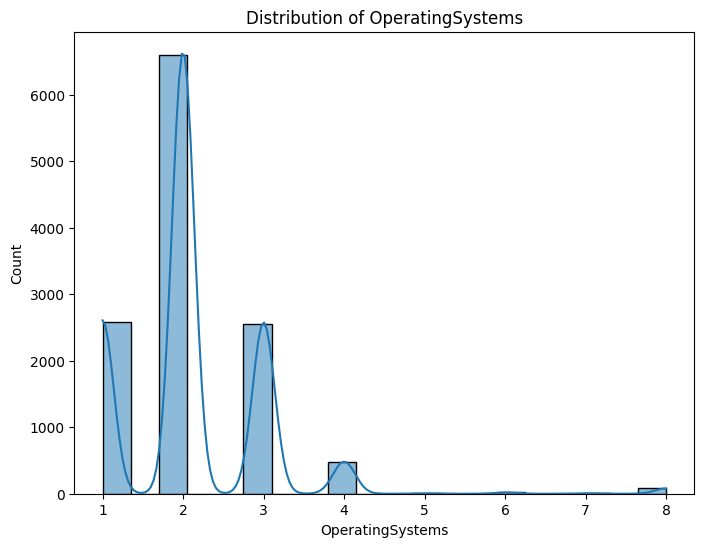

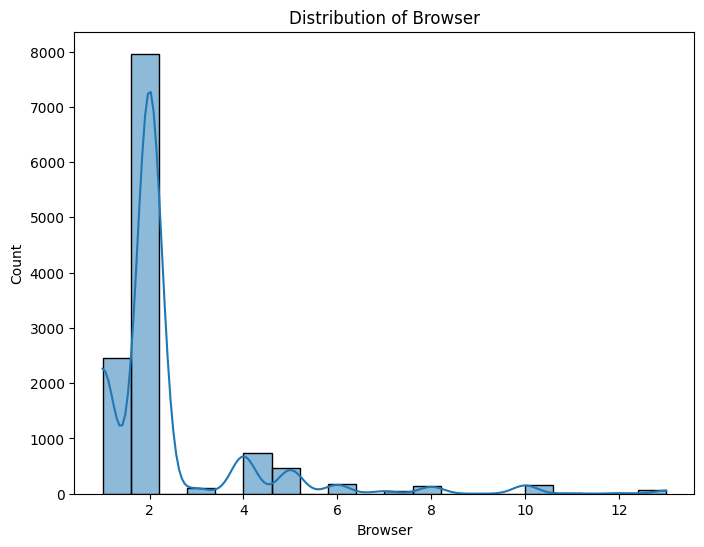

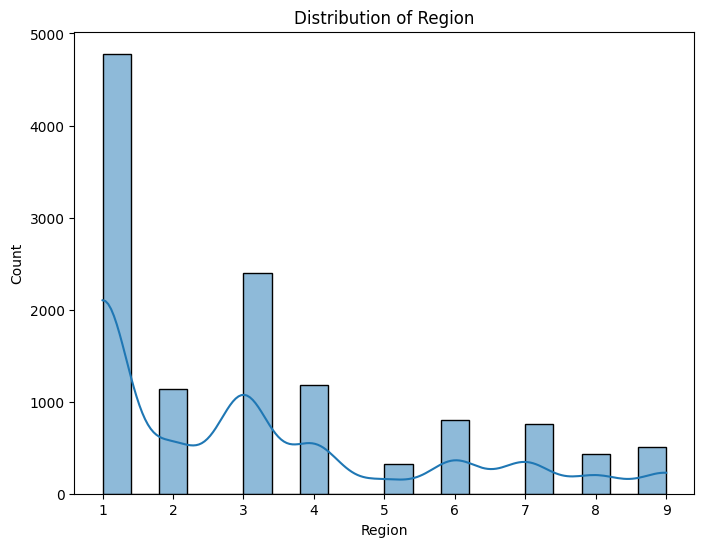

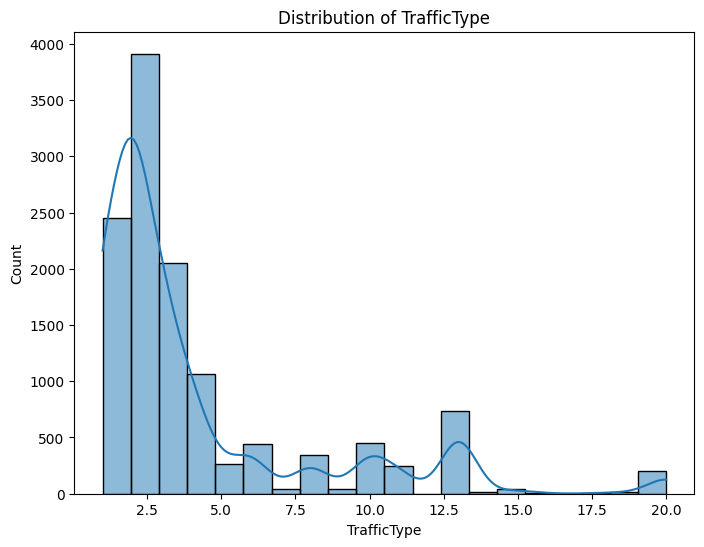

In [9]:
# Plot the distribution of numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

It appears that most of the numerical data is largely imbalanced, as visualized by the right skewed charts.

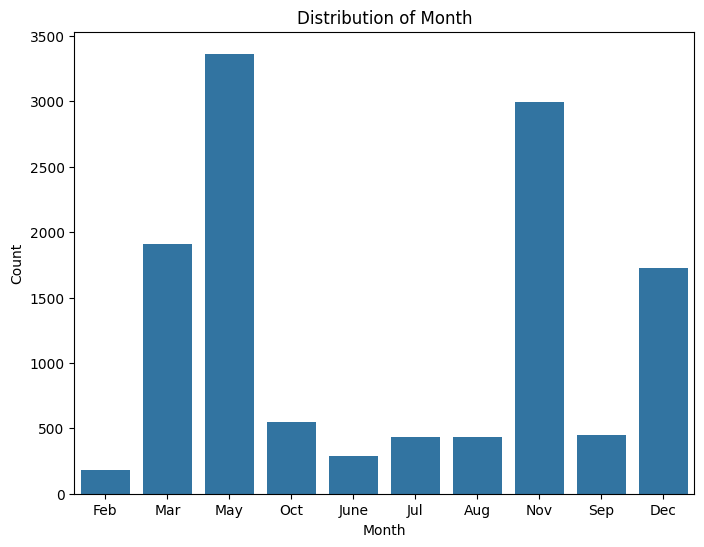

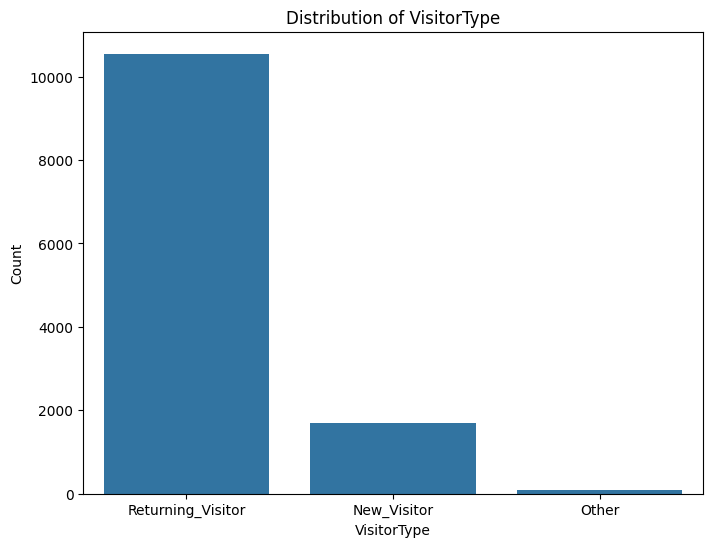

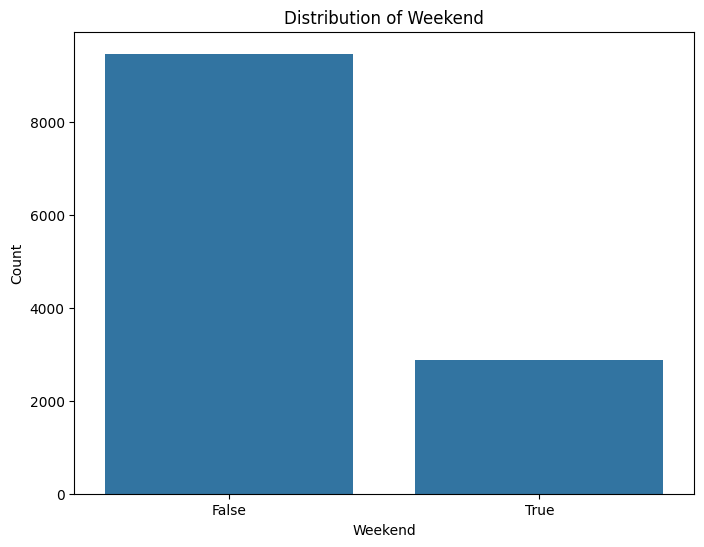

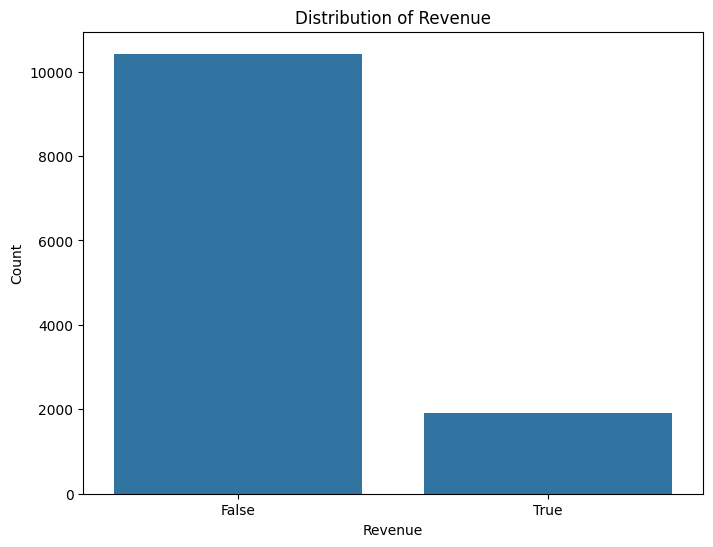

In [10]:
# Plot the distribution of categorical features
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

The categorical data also shows imbalance, with uneven distribution of the classes across all features.

# Encoding Categorical Variables into Numerical
for the correlation analysis & random forest classification

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables if needed
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

# Correlation Analysis

In [12]:
# Correlation analysis
corr_matrix = data.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Month                          0.048560                 0.029061   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                     

<function matplotlib.pyplot.show(close=None, block=None)>

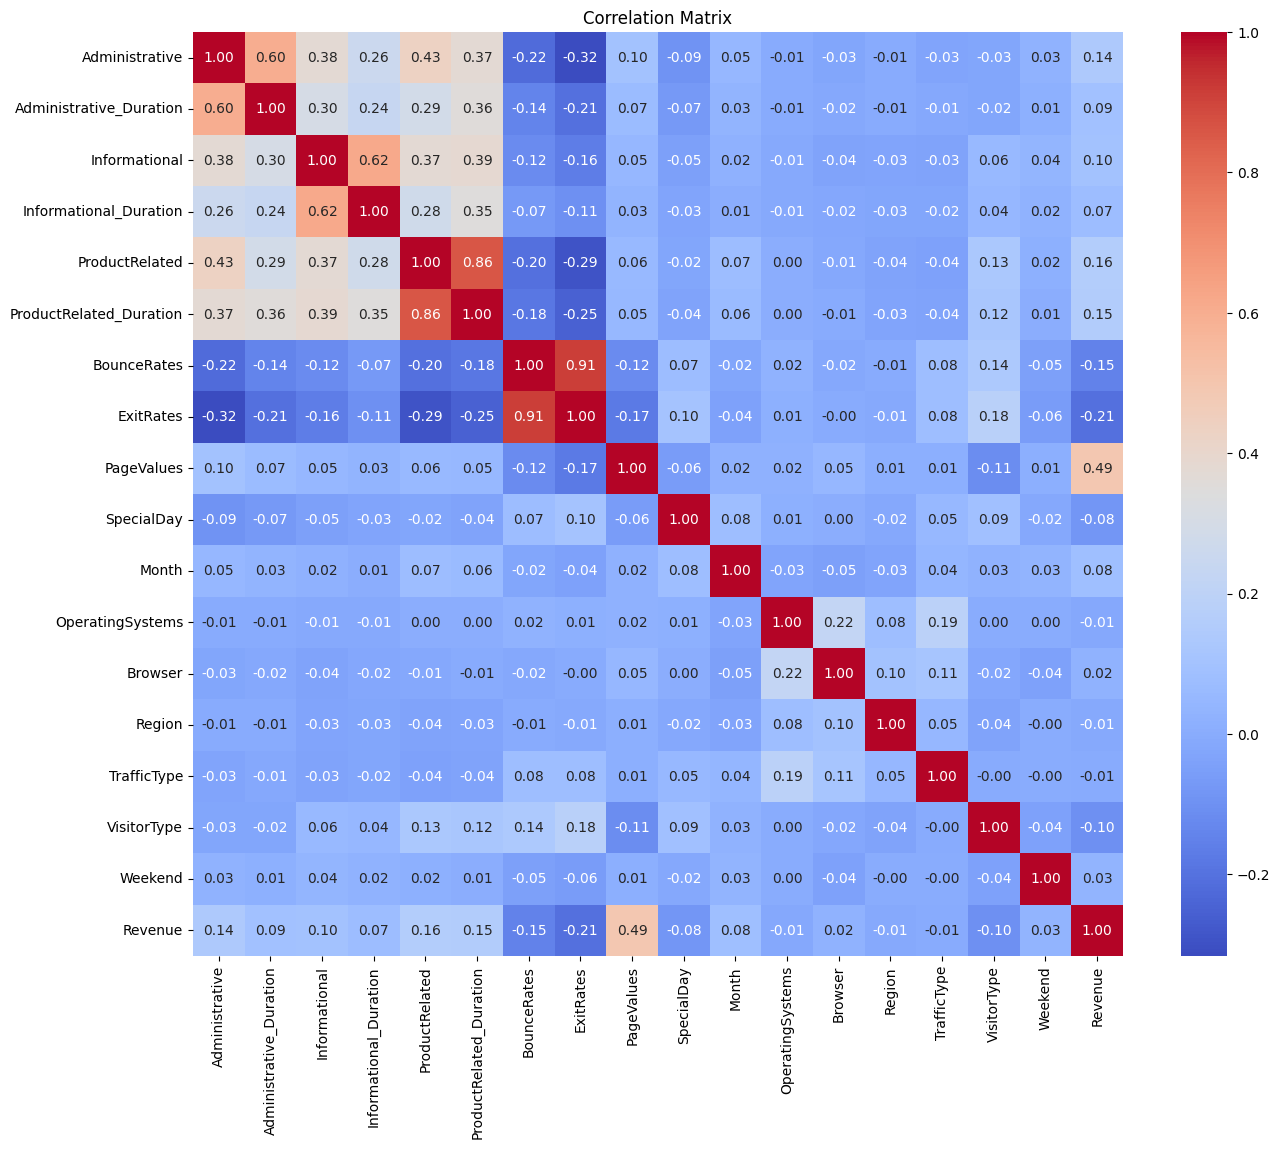

In [13]:
# Plot correlation matrix
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot = True , fmt = '.2f', cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show

In [14]:
# Features with the highest correlation with target 'Revenue'
correlated_features = corr_matrix['Revenue'].abs().sort_values(ascending=False)
print("Sorted Correlated Features:\n", correlated_features)

Sorted Correlated Features:
 Revenue                    1.000000
PageValues                 0.492569
ExitRates                  0.207071
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates                0.150673
Administrative             0.138917
VisitorType                0.104726
Informational              0.095200
Administrative_Duration    0.093587
SpecialDay                 0.082305
Month                      0.080150
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
OperatingSystems           0.014668
Region                     0.011595
TrafficType                0.005113
Name: Revenue, dtype: float64


PageValues has the highest correlation with Revenue amongst other data, and there is a large gap between the highest the second highest correlation--but the score is still below 0.5. There seems to be no strong correlation between Revenue and the rest of the data.

# Prepare Features

Because the question in this exploration asks whether potential shoppers will check out a product online or not, the target variable should be 'Revenue'.

As seen on the summary, Revenue is of boolean data type which tells us whether a customer contributes to revenue or not, therefore whether they leave the website with shopping or not.

In [ ]:
# Define features and target variable
X = data.drop('Revenue', axis=1) # Revenue is the target variable
y = data['Revenue'] # The rest are the features

# Classification & K-Fold Cross Validation

In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

In [ ]:
# Initialize KFold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Perform K-Fold Cross Validation and generate predictions
predictions = cross_val_predict(rf_classifier, X, y, cv=k_fold)

# Result

In [ ]:
# Perform K-Fold Cross Validation and calculate accuracy scores
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='accuracy')

# Calculate the mean accuracy score
mean_accuracy = round(accuracy_scores.mean(), 3)

# Print the mean accuracy score
print("Mean Accuracy Score:", mean_accuracy)

Mean Accuracy Score: 0.903


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y, predictions, target_names=['False', 'True']))

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94     10422
        True       0.73      0.57      0.64      1908

    accuracy                           0.90     12330
   macro avg       0.83      0.77      0.79     12330
weighted avg       0.89      0.90      0.90     12330



Confusion Matrix:
[[10031   391]
 [  824  1084]]


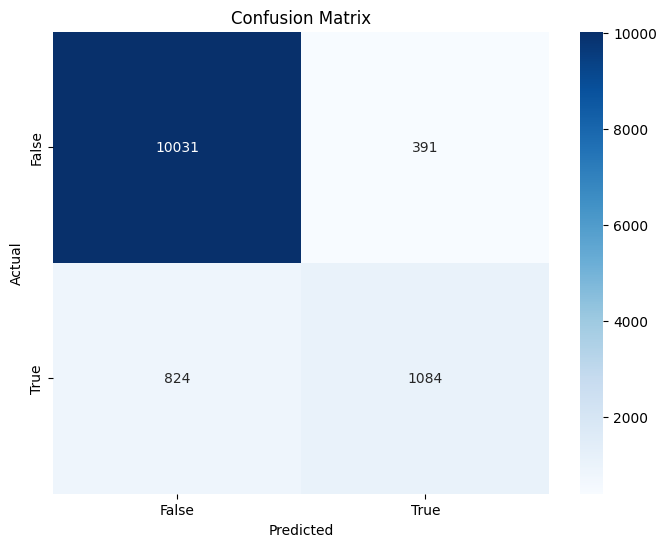

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()